In [2]:
from sklearn import datasets

# Covtype Dataset

In [3]:
# load covtype dataset
df = datasets.fetch_covtype(as_frame=True)['frame']

In [4]:
# df

In [5]:
# df.info()

In [6]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### Rename the Cover_type column to target

In [7]:
df = df.rename(columns={"Cover_Type":"target"})

## Preprocessing

Normalize the data. Use StandardScalar for this. This centers everything around 0 and scales each feature to a standard deviation of 1.

In [8]:
# from sklearn.preprocessing import StandardScaler

In [9]:
# df.iloc[:,:-1] = StandardScaler().fit_transform(df.iloc[:,:-1])
# df.describe()

## Split the Data into Train and Test

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(
    df,                           # input the df
    test_size=0.20,               # set test size to be 20% of the dataset
    random_state=42,              # name the random state. it can be anything integer. this just lets us call it again later.
    shuffle=True,                  # if you want to shuffle before splitting. you should
    stratify=df['target']       # stratify the shuffled data on this column...???
)

In [13]:
print(train.shape, test.shape)

(464809, 55) (116203, 55)


In [14]:
# train['target'].value_counts(normalize=True)

In [15]:
# test['target'].value_counts(normalize=True)

## Build a Random Forest Model

#### (We know it's logistic regression because we have many categories here in the target column)

In [16]:
from sklearn.ensemble import RandomForestClassifier

### Work with the training set
Separate out the features from the target (X from y).

Do this by defining X_train as all the df EXCEPT the last column (target), and also define y_train as ONLY the last column (target)

In [17]:
X_train = train.drop(columns=['target'])   # whole df minus target column
y_train = train['target']                  # just the target column

Might as well do the test values as well while we're at it

In [18]:
X_test = test.drop(columns=['target'])
y_test = test['target']

## Set up the model that we will use to train the data on
Choose a model and pick the parameters. Call it logreg.

In [95]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    random_state=0,
    bootstrap=True,
    class_weight='balanced',
    verbose=1,
    n_jobs=-1,
)

Show the model to the training data and solve for the wieghts.  Setting it to verbose will give you lots of info.

In [96]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   37.8s finished


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1)

## Predictions and Performance
Predict the class labels.  We do this with a method called predict that takes the feature df as the argument.

In [97]:
p_train = rf.predict(X_train)
p_train

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.4s finished


array([1, 1, 7, ..., 1, 1, 1], dtype=int32)

Predict class probablities. The probabilities are the actual numbers behind the discsions that gave us the predictions in p above.  Since there are 3 categories for each feature, it looks at how likely it is is to be 0, how likely 1, how likely 2.  The probabilities don't have to add up to 1. It's just a direct max value out of 3 options. You should be able to look at each row and match up the chosen target prediction above with the max probability here.

In [98]:
pp_train = rf.predict_proba(X_train.iloc[:6,:])
pp_train

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


array([[5.77886691e-01, 2.65421209e-01, 5.13411480e-03, 3.13840994e-04,
        2.84870178e-02, 2.40184474e-03, 1.20355281e-01],
       [3.64314773e-01, 3.29739140e-01, 2.90105293e-02, 1.82835365e-03,
        1.10378883e-01, 4.06269944e-02, 1.24101327e-01],
       [2.50234647e-01, 1.16949841e-01, 3.18822423e-03, 2.94273757e-04,
        2.98812130e-02, 3.42849401e-03, 5.96023307e-01],
       [4.58022448e-01, 2.87246408e-01, 3.15260164e-02, 1.19227248e-03,
        1.02591260e-01, 2.17412221e-02, 9.76803737e-02],
       [9.31803164e-02, 1.58030765e-01, 1.27766656e-02, 2.61023514e-03,
        7.00885210e-01, 1.62264602e-02, 1.62903476e-02],
       [5.85771514e-01, 5.31032523e-02, 3.75968714e-03, 2.55239026e-03,
        2.57424838e-02, 1.74789994e-03, 3.27322772e-01]])

Let's just look at the first 6 values from the prediction array and compare to the actual data, the y_train

In [99]:
p_train6 = rf.predict(X_train.iloc[:6,:])
actual6 = y_train.values[:6]

print(f"training array = {p_train6}")
print(f"actual array = {actual6}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


training array = [1 1 7 1 5 1]
actual array = [2 2 7 1 5 1]


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


Lets check predictions on the test set now

In [100]:
p_test = rf.predict(X_test.iloc[:6,:])
actual_test = y_test.values[:6]

print(f"test array = {p_test}")
print(f"actual array = {actual_test}")

test array = [1 3 3 3 1 4]
actual array = [1 3 2 3 1 6]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


## Check the training set
There are a number of ways to check the model to see if it's good.  You need to determine what is important to you for this model to know what to choose. 

ie, what defines a good model?  Is it Accuracy? Recall? ROC AUC?  I'm not a Data Scientist so I'm not going to go into all of this, but you need to know which metric you are going to test your model on.

For this, let's use accuracy and roc_auc.  Sklearn lets us do these very quickly and easily.

### Accuracy

In [101]:
# import the from metrics the tools you want to use
from sklearn.metrics import accuracy_score, roc_auc_score

In [102]:
# Training data accuracy
training_accuracy = accuracy_score(y_train, p_train)

print(f"train accuracy: {training_accuracy:.2f}")

train accuracy: 0.67


In [103]:
# Test accuracy
test_accuracy = accuracy_score(y_test, rf.predict(X_test))

print(f"test accuracy: {test_accuracy:.2f}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s


test accuracy: 0.67


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.6s finished


## ROC AUC

In [104]:
pp_train = rf.predict_proba(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.3s finished


In [105]:
pp_test = rf.predict_proba(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.6s finished


In [106]:
# Training data ROC AUC
training_auc = roc_auc_score(y_train, pp_train, multi_class='ovo')

print(f"train auc: {training_auc:.2f}")

train auc: 0.98


In [107]:
# Test data ROC AUC
test_auc = roc_auc_score(y_test, pp_test, multi_class='ovo')

print(f"test auc: {test_auc:.2f}")

test auc: 0.97


### Classification Report
If you don't know which metric to use, you can use a cool options that does multiple classification metrics at once.  Sklearn has classification_report that will give you a number to look at all in one shot. It takes for it's arguments: your test target, and your test prediction.

In [58]:
from sklearn.metrics import classification_report

In [59]:
# just a couple of print statements to make it look nice...
print("Test Dataset")
print("---"*20)
print(classification_report(y_test, rf.predict(X_test)))

Test Dataset
------------------------------------------------------------


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.7s finished


              precision    recall  f1-score   support

           1       0.61      0.59      0.60     42368
           2       0.83      0.35      0.50     56661
           3       0.67      0.44      0.53      7151
           4       0.18      0.97      0.30       549
           5       0.07      0.83      0.13      1899
           6       0.33      0.61      0.43      3473
           7       0.25      0.93      0.39      4102

    accuracy                           0.48    116203
   macro avg       0.42      0.67      0.41    116203
weighted avg       0.69      0.48      0.52    116203



## Feature Importance

,score
Elevation,0.275296
Aspect,0.007138
Slope,0.006919
Horizontal_Distance_To_Hydrology,0.036660
Vertical_Distance_To_Hydrology,0.013640


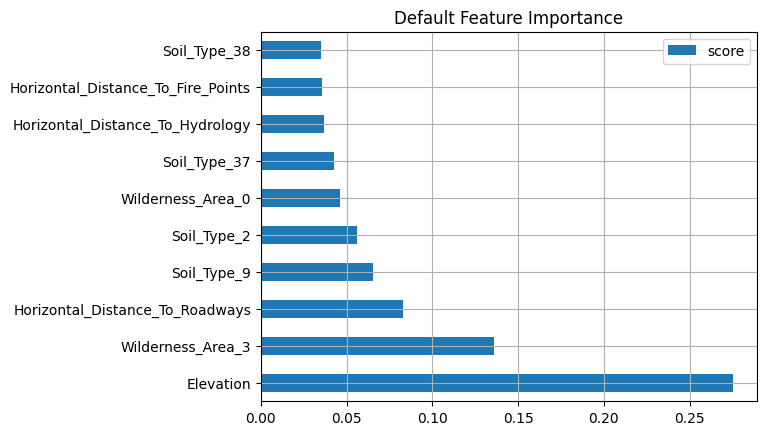

In [85]:
import pandas as pd

foo = {feat: imp for feat, imp in zip(X_train.columns, rf.feature_importances_)}
feat = pd.DataFrame.from_dict(foo, orient="index")
feat.columns = ["score"]
feat.sort_values("score", ascending=False).head(10).plot(kind="barh", grid=True, title="Default Feature Importance");

feat.head()

## Decision Boundary
Now we'll use the this best 2 features to create a decision boundary plot of these two most influential features.

In [42]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [112]:
best_2 = ["Elevation", "Horizontal_Distance_To_Roadways"]

In [125]:
# make a new model consisting of the 2 best features
X = X_train.loc[:, best_2]
Y = y_train

rf2 = RandomForestClassifier(
    n_estimators=1000,
    max_depth=10,
    random_state=0,
    bootstrap=True,
    class_weight='balanced',
    verbose=1,
    n_jobs=-1,
).fit(X,Y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   50.1s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished


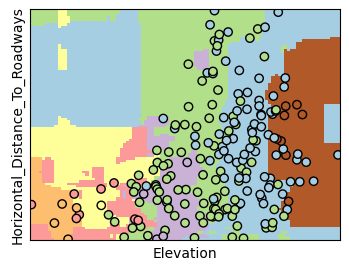

In [126]:
# number of obs to plot
N = 200

# Now we plot
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    rf2,
    X.head(N),
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel=X.columns[0],
    ylabel=X.columns[1],
    eps=0.5,
)

# Plot also the training points
plt.scatter(X.iloc[:N, 0], X.iloc[:N, 1], c=Y.head(N), edgecolors="k", cmap=plt.cm.Paired)
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()